## Bellabeat Capstone Project|R
### 1.Company Background

Bellabeats is a high-tech company founded by Urška Sršen and Sando Mur in 2013. It manufactures health-focused smart products that collects data on activity, sleep, stress and reproductive health and helps women around the world grow healthy habits. By 2016, Bellabeat has expanded their products globally, through online retailers and selling them on their own e-commerce [website](https://bellabeat.com/).

Bellabeat has launched 5 products:

1.**Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

2.**Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.

3.**Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

4.**Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your
hydration levels.

5.**Bellabeat Membership**:  Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

### 2.Ask 

#### 2.1 Business Task

As an analyst working in the marketing analyst team I will use the smart device usage data in order to gain insights into how customers use non-Bellabeat smart devices. I will then use these insights to recommend some market strategies which will be presented to the key stakeholders. In this case study, I will focus on the **Bellabeat App** for recommendations.

#### 2.2 Key Stakeholders

* Urška Sršen: cofounder and Chief Creative Officer.

* Sando Mur: cofounder and a key member of the Bellabeat executive team.

* Bellabeat marketing analytics team.

### 3. Prepare

The following public dataset was used for exploring smart device users’ daily habits.

* [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic) ): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits, in CSV files.

We will use R as the tool for processing, analyzing and visualizing the datasets, on RStudio. All 18 files are uploaded on the RStudio work directory.

#### 3.1 Loading packages

Here are the packages used in the case study:


In [1]:

library('tidyverse')
library('lubridate')
library('dplyr')
library('skimr')
library('lubridate')  #work with dates
library('date')
library('ggplot2')
library('waffle')
library('hrbrthemes')


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



#### 3.2 Exploring data files

We decide to read all the 18 CSV file, their structure and variables, then decide which files to upload and use for analysis.
They all contain `Id` as the primary keys, and each file include multiple variables such as `ActivityHour`, `Time`, `Distance`, `Steps`, `Intensities`, `Calories`, `Weight`, etc.

We also observe some limitations in the given dataset:

  1. The sample size is small, with only 33 distinct users. After cleaning and grouping the size becomes even smaller and may not yield accurate results.
  
  2. Demographic information like gender, age is not provided in the dataset. Since, Bellabeat's primary focus is on women's health and wellness, so assuming that the data is primarily about women would be ideal.
  
  3. The dataset doesn't provide current fitness trends among women, as it was collected in 2016. Due to the global pandemic, lifestyle habits have changed significantly among people.
  
  
  
#### 3.3 Importing files

We import the files into dataframes and name them.

In [2]:


daily_activity <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_calories <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensity <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
daily_steps <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
hourly_calories <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_Intensities <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_Steps <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
sleep <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

#### 3.4 Verify data
#### 3.4.1 Data Integrity and Validation

We can check for any missing data or extreme values in the data. 

Next, we check for any missing data or extreme value on the dataset.

In [3]:
skim(daily_activity)
skim(daily_calories)
skim(daily_intensity)
skim(daily_steps)
skim(hourly_calories)
skim(hourly_Intensities)
skim(hourly_Steps)
skim(sleep)


── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

Since all the dataframes return 940 rows, we now know that there are no missing or extreme values in our data. 

After this, we try to verify the logic of the dataset.

In [4]:
sum(sleep$TotalMinutesAsleep > 1440)  #24hrs = 1440 mins
sum(sleep$TotalMinutesAsleep > sleep$TotalTimeInBed)


[1] 0

[1] 0

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(daily_calories))
sum(duplicated(daily_intensity))
sum(duplicated(daily_steps))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_Steps))
sum(duplicated(hourly_Intensities))
sum(duplicated(sleep))


[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

All files have 0 duplicate, except for sleep, where there are 3 duplicates.

In [6]:

#sleep has 3 duplicate entries.
sleep <- unique(sleep)
sum(duplicated(sleep))

#Check for NA data
sum(is.na(daily_activity))
sum(is.na(hourly_Steps))
sum(is.na(sleep))


[1] 0

[1] 0

[1] 0

[1] 0

### 4. Process
First step in this phase is data cleaning. We notice the columns are in CamelCase naming convention. As R is case sensitive, we convert our column names to lower case.

#### 4.1 Change Column Names

In [7]:

daily_activity <- rename_with(daily_activity, tolower)
sleep <- rename_with(sleep, tolower)
hourly_Steps <- rename_with(hourly_Steps, tolower)

In [8]:
head(daily_activity)
head(sleep)
head(hourly_Steps)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


id,activityhour,steptotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


#### 4.2 Formatting date and time columns
We convert character format to date format. First, we make consistent date format in `activity` and `sleep`, as `sleep` will be merged into `activity`.

In [9]:
#converting character to date format
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y"))

sleep <- sleep %>% 
  rename(date = sleepday) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))

head(daily_activity)
head(sleep)

Warning message:
“`tz` argument is ignored by `as_date()`”


id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


Next we convert `$activityhour` column in `hourly_Steps` data to date-time format.

In [10]:
hourly_Steps <- hourly_Steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))

head(hourly_Steps)

id,date_time,steptotal
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


#### 4.3 Merge Dataframes.
Now we merge `daily_activity` and `sleep` into `activity_sleep` dataframe.

In [11]:
activity_sleep <- merge(daily_activity, sleep, by = c("id", "date"), all.x = TRUE)
head(activity_sleep)


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712


### 5. Analyze
#### 5.1 Daily data summary

We first observe the summary of our `activity_sleep` data.

In [12]:
activity_sleep %>% 
  select(totalsteps, calories,
         veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes,
         totalsleeprecords, totalminutesasleep, totaltimeinbed) %>% 
  drop_na() %>% 
  summary()

   totalsteps       calories    veryactiveminutes fairlyactiveminutes
 Min.   :   17   Min.   : 257   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 5189   1st Qu.:1841   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8913   Median :2207   Median :  9.00    Median : 11.00     
 Mean   : 8515   Mean   :2389   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:11370   3rd Qu.:2920   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :22770   Max.   :4900   Max.   :210.00    Max.   :143.00     
 lightlyactiveminutes sedentaryminutes totalsleeprecords totalminutesasleep
 Min.   :  2.0        Min.   :   0.0   Min.   :1.00      Min.   : 58.0     
 1st Qu.:158.0        1st Qu.: 631.2   1st Qu.:1.00      1st Qu.:361.0     
 Median :208.0        Median : 717.0   Median :1.00      Median :432.5     
 Mean   :216.5        Mean   : 712.1   Mean   :1.12      Mean   :419.2     
 3rd Qu.:263.0        3rd Qu.: 782.8   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :518.0        Max.   :1265.0   Max.   :3.00   

Key findings:

*   On an average, users take 7,638 steps each day. This average is lower than the 10,000 steps recommended by CDC.

*   On average, each user spends 16.5 hours per day being seated or inactive, which accounts to almost 70% of the day.

*   On an average, people sleep 6.98 hours per day.

#### 5.2 Correlations

We want to find out if there is any relation between these variables:

*   Daily steps v/s Calories

*   Daily steps v/s Sleep


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



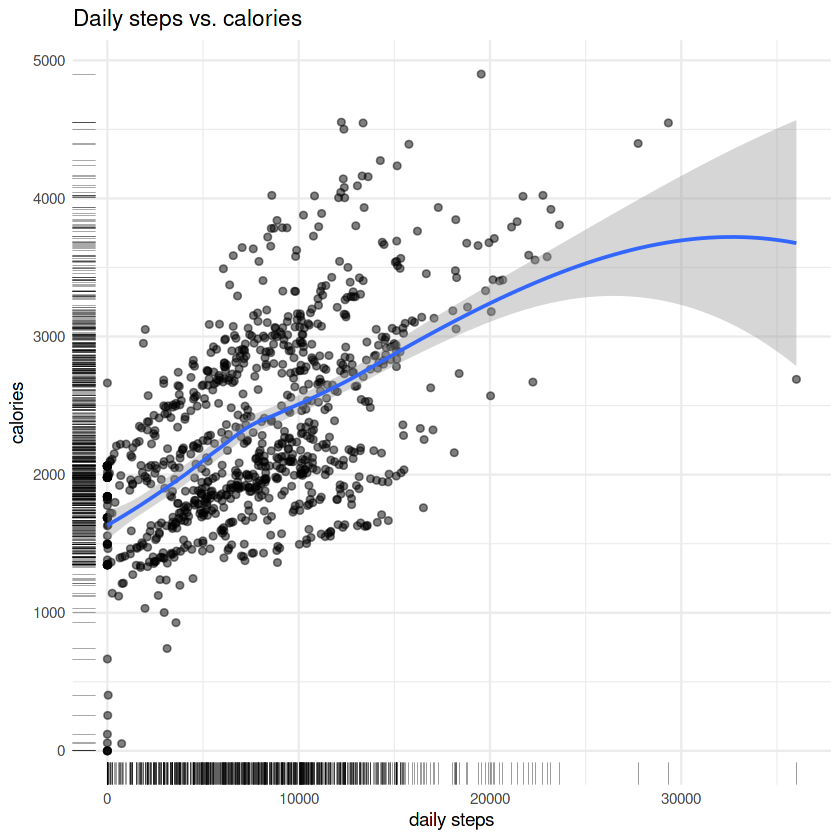

In [13]:
#steps vs calories
ggplot(activity_sleep,aes(totalsteps,calories))+geom_jitter(alpha=.5)+
  geom_rug(position="jitter", size=.08)+geom_smooth(size =.8)+
  labs(title= "Daily steps vs. calories", x= "daily steps", y="calories")+
  theme_minimal()

From the above graph, it is clear that there is a direct relation between daily steps taken and daily calories burned. Hence, one may infer that, more the steps taken, more calories are burnt.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



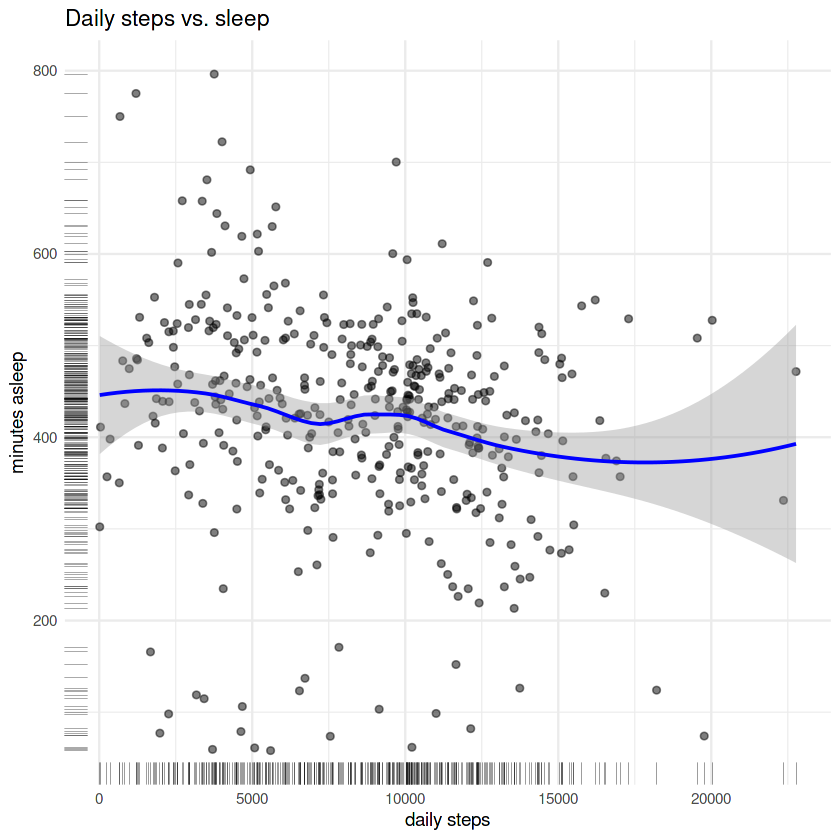

In [14]:
#steps vs. sleep  - no correlation found
ggplot(data= subset(activity_sleep,!is.na(totalminutesasleep)),aes(totalsteps,totalminutesasleep))+
  geom_rug(position= "jitter", size=.08)+geom_jitter(alpha= 0.5)+geom_smooth(color= "blue", size=.8)+
  labs(title= "Daily steps vs. sleep", x= "daily steps", y= "minutes asleep")+
  theme_minimal()

We find from the above graph that there is no relation between daily steps taken and amount of minutes slept on a day.


#### 5.3 Measuring activity levels during an entire week.

We want to find out when users are most active. For this, we separate date and time in`hourly_Steps` dataframe.

In [15]:
#separate date in hourly_steps
hourly_Steps <- hourly_Steps %>% 
  separate(date_time, into= c("date", "time"), sep = " ") %>% 
  mutate(date= ymd (date))

head(hourly_Steps)

id,date,time,steptotal
<dbl>,<date>,<chr>,<dbl>
1503960366,2016-04-12,00:00:00,373
1503960366,2016-04-12,01:00:00,160
1503960366,2016-04-12,02:00:00,151
1503960366,2016-04-12,03:00:00,0
1503960366,2016-04-12,04:00:00,0
1503960366,2016-04-12,05:00:00,0


Add $weekday as new column

In [16]:
h_step_weekday <- (hourly_Steps) %>% 
  mutate(weekday= weekdays(date))%>%
  group_by (weekday,time) %>% 
  summarize(average_steps= mean(steptotal), .groups = 'drop')

h_step_weekday$weekday <- ordered(h_step_weekday$weekday, 
                                  levels=c("Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"))

head(h_step_weekday)

weekday,time,average_steps
<ord>,<chr>,<dbl>
Friday,00:00:00,44.27778
Friday,01:00:00,19.00794
Friday,02:00:00,16.27778
Friday,03:00:00,10.80159
Friday,04:00:00,14.43651
Friday,05:00:00,61.23016


We think a heatmap can show user's activity levels in one glance.

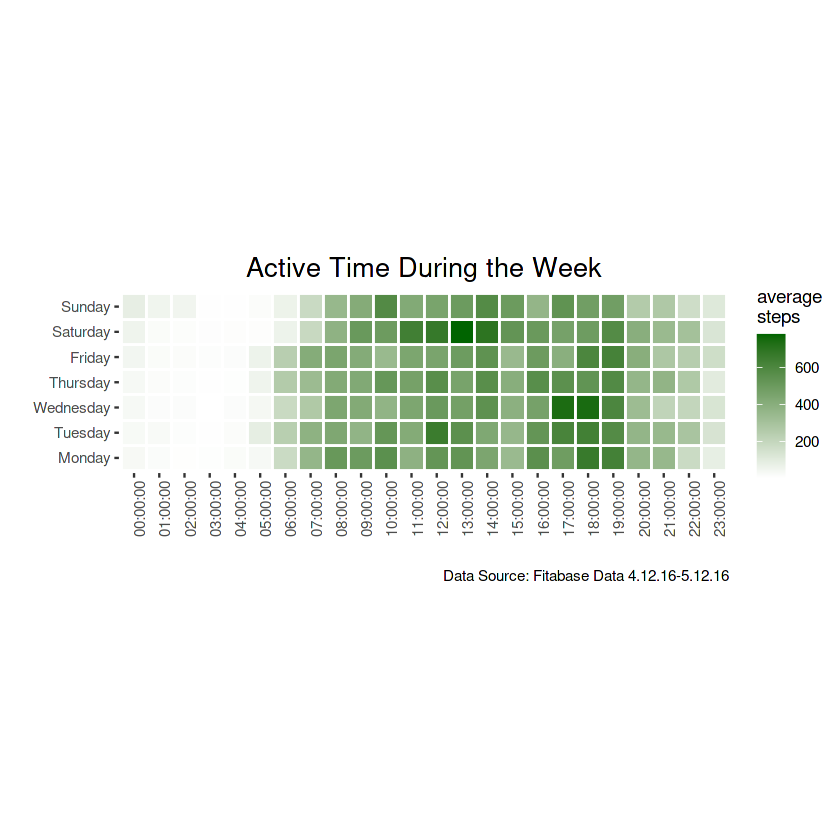

In [17]:
ggplot(h_step_weekday, aes(x= time, y= weekday, 
                           fill= average_steps)) +
  theme(axis.text.x= element_text(angle = 90))+
  labs(title= "Active Time During the Week", 
       x=" ", y=" ",fill = "average\nsteps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_gradient(low= "white", high="darkgreen")+
  geom_tile(color= "white",lwd =.6,linetype =1)+
  coord_fixed()+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        panel.background= element_blank())

**Observation:** Users tend to start their day later on weekends, that is around 9am - 10am in the morning. They are msot active on Wednesdays between 4pm - 6pm, and around 11am - 1pm on Saturdays.


#### 5.4 Grouping users into 4 types
#### 5.4.1 Classification

In [18]:
# Grouping users into four types
daily_average <- activity_sleep %>% 
  group_by (id) %>% 
  summarise(avg_daily_steps= mean(totalsteps), 
            avg_daily_cal= mean(calories), 
            avg_daily_sleep= mean(totalminutesasleep, 
                                  na.rm = TRUE)) %>% 
  mutate(user_type= case_when(
    avg_daily_steps < 5000 ~ "sedentary",
    avg_daily_steps >= 5000 & avg_daily_steps <7499 ~"lightly active",
    avg_daily_steps >= 7499 & avg_daily_steps <9999 ~"fairly active",
    avg_daily_steps >= 10000 ~"very active"
  ))

head(daily_average)

id,avg_daily_steps,avg_daily_cal,avg_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,very active
1624580081,5743.903,1483.355,NaN,lightly active
1644430081,7282.967,2811.300,294.00,lightly active
1844505072,2580.065,1573.484,652.00,sedentary
1927972279,916.129,2172.806,417.00,sedentary
2022484408,11370.645,2509.968,NaN,very active


Converting sums into percentages:

In [19]:
user_type_sum <- daily_average %>%
  group_by(user_type) %>%
  summarise(total= n()) %>%
  mutate(total_percent= scales::percent (total/sum(total)))

user_type_sum

user_type,total,total_percent
<chr>,<int>,<chr>
fairly active,9,27.3%
lightly active,9,27.3%
sedentary,8,24.2%
very active,7,21.2%


Despite the small sample size, all users are fairly distributed among 4 types. So, we can say that data is somewhat unbiased in terms of activity level.

#### 5.5 Utitlity of the tracker

We want to know how users wear the tracker, We can identify the number of days they wore the tracker, and group them into 3 categories: _low_, _mid_ and _high_.

In [20]:
activity_sleep_final <- merge(activity_sleep, daily_average[c("id","user_type")], by="id") 

activity_sleep_final$user_type <-ordered(activity_sleep_final$user_type,
                                         levels= c("sedentary","lightly active","fairly active","very active")) 

head(activity_sleep_final)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,user_type
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,very active
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,very active
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,very active
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,very active
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,very active
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,very active


In [21]:
days_usage <- activity_sleep_final %>%
  group_by(id) %>%
  summarize(record_days=sum(n())) %>%
  mutate(usage= case_when(
    record_days >= 1 & record_days <= 10 ~ "low",
    record_days >= 11 & record_days <=20 ~ "mid",
    record_days >= 21 & record_days <= 31 ~ "high", 
  ))

head(days_usage)

id,record_days,usage
<dbl>,<int>,<chr>
1503960366,31,high
1624580081,31,high
1644430081,30,high
1844505072,31,high
1927972279,31,high
2022484408,31,high


Then we calculate percentage of each category:

In [22]:
days_usage_percent <- days_usage %>%
  group_by(usage) %>%
  summarise(user_count= n()) %>%
  mutate(total_percent= scales::percent(user_count/sum(user_count)))


Usage group distribution:

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



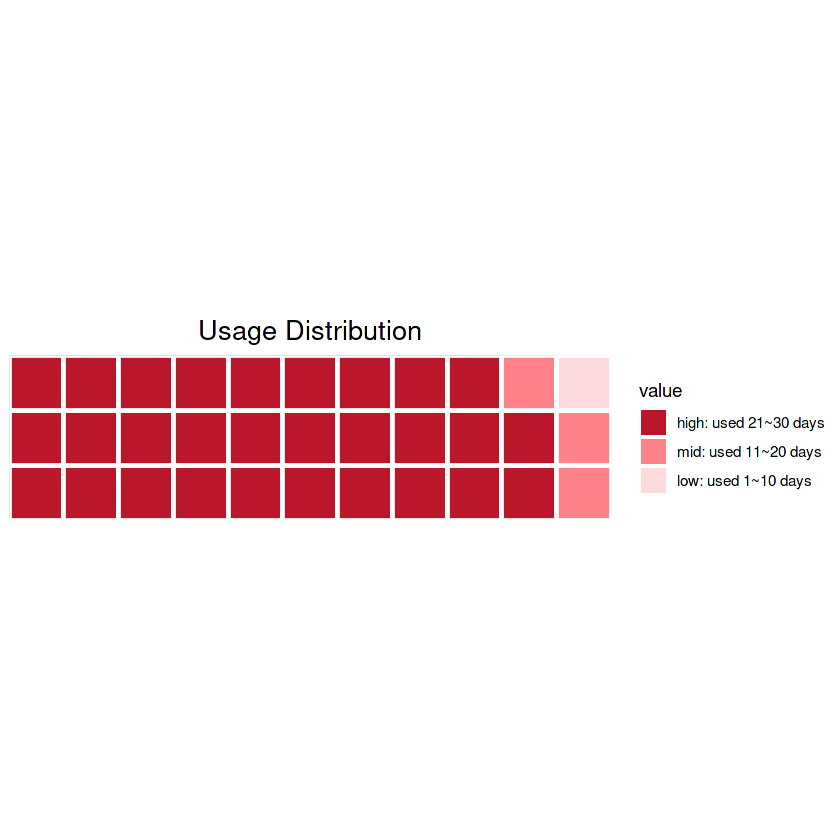

In [23]:

days_usage_waffle=c("high: used 21~30 days" =29,"mid: used 11~20 days"= 3, "low: used 1~10 days"=1)

waffle(days_usage_waffle, row=3, size=1, legend_pos='right')+
  labs(title= "Usage Distribution")+
  scale_fill_manual(values=c("#BA182A","#FF8288","#FFDBDD"))+
  theme(panel.background= element_blank(),
        plot.title= element_text(hjust= 0.5,vjust= 1, size=16))



Most users wear tracker for more than 21 days during the period of a month. As observed, not all users wear the tracker for 24 hours every day. 

We will look for any kind of trend within this time frame.

We group hourly step by date:


In [24]:
h_step_trend<-(hourly_Steps) %>%
  group_by(date) %>%
  summarise(average_hr= n()/33)

head(h_step_trend) #avg hours, users keep the tracker on.


date,average_hr
<date>,<dbl>
2016-04-12,24.00000
2016-04-13,24.00000
2016-04-14,24.00000
2016-04-15,23.75758
2016-04-16,23.27273
2016-04-17,23.27273


A line chart show how users wear the tracker over time:

In [25]:

require(ggplot2)
require(scales)


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




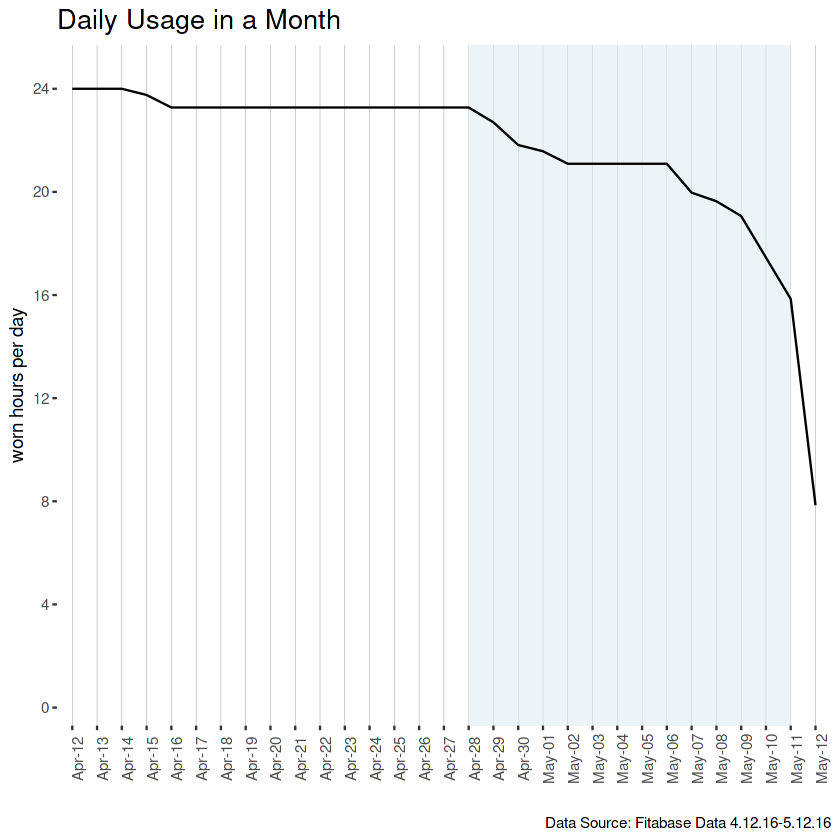

In [26]:
ggplot(h_step_trend, aes(x=date,y=average_hr))+
  scale_x_date(breaks= date_breaks("1 day"), #breaks= date_breaks("1 day")
               labels= date_format("%b-%d"), 
               limits=(c(min(h_step_trend$date),
                         max(h_step_trend$date))),
               expand=c(.02,.02))+
  scale_y_continuous(limits=c(0,25),
                     breaks= seq(0,max(h_step_trend$average_hr),by= 4), 
                     expand= c(0,.7))+
  labs(title="Daily Usage in a Month", 
       x=" ", y="worn hours per day",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+ 
  annotate("rect", xmin= as.Date("2016-04-28"), 
           xmax= as.Date("2016-05-11"),
           ymin= -Inf, ymax = Inf, 
           fill= "#E0ECF4", alpha=.6)+ 
  theme(axis.text.x= element_text(angle = 90), 
        plot.title= element_text(size=16),
        panel.grid.major.x=element_line(colour="grey60",
                                        linetype="solid",size=0.1),
        panel.background= element_blank())+geom_line()

### 6.Act

Key findings:

*   On an average, users take 7,638 steps each day. This average is lower than the 10,000 steps recommended by CDC.

*   On average, each user spends 16.5 hours per day being seated or inactive, which accounts to almost 70% of the day.

*   On an average, people sleep 6.98 hours per day.  

*   Users tend to start their day later on weekends, that is around 9am - 10am in the morning. They are most active on Wednesdays between 4pm - 6pm, and around 11am - 1pm on Saturdays.

*   The _lightly active_ type has the longest sleep, while the _very active_ type has lowest duration of sleep.

Based on the findings, below are few suggestions:

*   The App could recommend daily steps target based on user's profile, lifestyle and personal information available in the app. It can also send daily reminders and alerts to their users, if they start to fall behind their daily target.

*   The Bellabeat App can provide a playlist of songs for meditation, to encourage their users to meditate to elevate their users' mental health and wellness. They can also send weekly health tips on their device. 